<a href="https://colab.research.google.com/github/pdwivedi1990/Git_Repo/blob/master/Deep_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
import numpy as np
 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
 
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
 
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='adamax',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [3]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='adamax',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [4]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 32ms/step - loss: 0.5882 - acc: 0.7544 - val_loss: 0.4703 - val_acc: 0.8498
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3691 - acc: 0.8805 - val_loss: 0.3412 - val_acc: 0.8774
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2742 - acc: 0.9067 - val_loss: 0.2990 - val_acc: 0.8852
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2297 - acc: 0.9212 - val_loss: 0.2829 - val_acc: 0.8888
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2020 - acc: 0.9292 - val_loss: 0.2784 - val_acc: 0.8895
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1820 - acc: 0.9370 - val_loss: 0.2798 - val_acc: 0.8880
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1661 - acc: 0.9431 - val_loss: 0.2830 - val_acc: 0.8877
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1528 - a

In [5]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 27ms/step - loss: 0.6532 - acc: 0.5735 - val_loss: 0.6114 - val_acc: 0.6388
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.5717 - acc: 0.7063 - val_loss: 0.5578 - val_acc: 0.7565
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.5224 - acc: 0.8029 - val_loss: 0.5242 - val_acc: 0.8186
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.4883 - acc: 0.8496 - val_loss: 0.5007 - val_acc: 0.8362
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.4616 - acc: 0.8740 - val_loss: 0.4826 - val_acc: 0.8488
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.4391 - acc: 0.8908 - val_loss: 0.4683 - val_acc: 0.8571
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 0.4197 - acc: 0.9027 - val_loss: 0.4570 - val_acc: 0.8613
Epoch 8/20
49/49 [==============================] - 1s 21ms/step - loss: 0.4022 - a

In [6]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

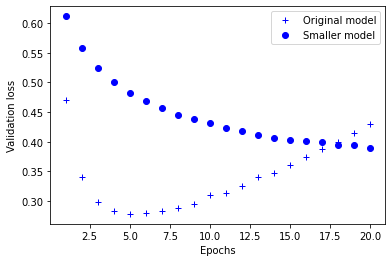

In [7]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
#plt.suptitle("")
plt.legend()

plt.show()

In [8]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='adamax',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [9]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 23s 467ms/step - loss: 0.3534 - acc: 0.8517 - val_loss: 0.2838 - val_acc: 0.8854
Epoch 2/20
49/49 [==============================] - 23s 459ms/step - loss: 0.1687 - acc: 0.9386 - val_loss: 0.3020 - val_acc: 0.8820
Epoch 3/20
49/49 [==============================] - 22s 455ms/step - loss: 0.1050 - acc: 0.9667 - val_loss: 0.3398 - val_acc: 0.8791
Epoch 4/20
49/49 [==============================] - 23s 459ms/step - loss: 0.0526 - acc: 0.9871 - val_loss: 0.3906 - val_acc: 0.8750
Epoch 5/20
49/49 [==============================] - 22s 454ms/step - loss: 0.0214 - acc: 0.9968 - val_loss: 0.4434 - val_acc: 0.8742
Epoch 6/20
49/49 [==============================] - 22s 456ms/step - loss: 0.0087 - acc: 0.9994 - val_loss: 0.4896 - val_acc: 0.8730
Epoch 7/20
49/49 [==============================] - 22s 458ms/step - loss: 0.0044 - acc: 0.9999 - val_loss: 0.5209 - val_acc: 0.8738
Epoch 8/20
49/49 [==============================] - 22s 458ms/step - 

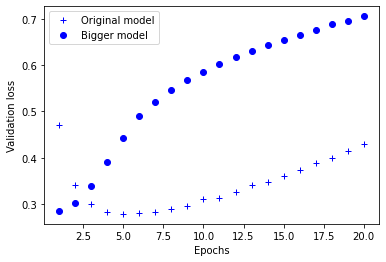

In [10]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

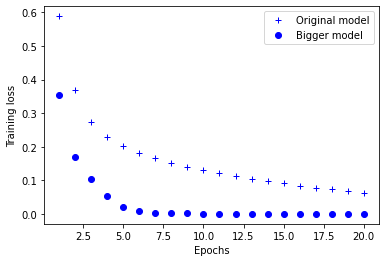

In [11]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [12]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
l2_model.compile(optimizer='adamax',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [14]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 29ms/step - loss: 0.6065 - acc: 0.7843 - val_loss: 0.4887 - val_acc: 0.8506
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.4066 - acc: 0.8828 - val_loss: 0.3851 - val_acc: 0.8790
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3255 - acc: 0.9045 - val_loss: 0.3461 - val_acc: 0.8843
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2846 - acc: 0.9172 - val_loss: 0.3296 - val_acc: 0.8876
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2605 - acc: 0.9245 - val_loss: 0.3249 - val_acc: 0.8879
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2426 - acc: 0.9324 - val_loss: 0.3208 - val_acc: 0.8884
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2294 - acc: 0.9375 - val_loss: 0.3231 - val_acc: 0.8874
Epoch 8/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2187 - a

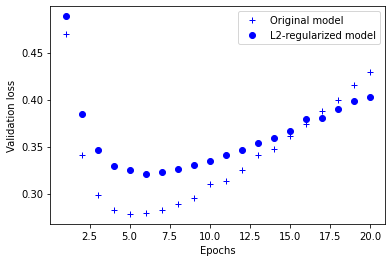

In [15]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [16]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

In [17]:
from keras import regularizers

l12_model = models.Sequential()
l12_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                          activation='relu', input_shape=(10000,)))
l12_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                          activation='relu'))
l12_model.add(layers.Dense(1, activation='sigmoid'))
l12_model.compile(optimizer='adamax',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l12_model_hist = l12_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))


Epoch 1/20
49/49 [==============================] - 2s 32ms/step - loss: 1.2318 - acc: 0.7577 - val_loss: 0.6861 - val_acc: 0.8412
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.6030 - acc: 0.8540 - val_loss: 0.5597 - val_acc: 0.8573
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 0.5285 - acc: 0.8654 - val_loss: 0.5186 - val_acc: 0.8624
Epoch 4/20
49/49 [==============================] - 1s 26ms/step - loss: 0.4967 - acc: 0.8705 - val_loss: 0.4966 - val_acc: 0.8653
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.4783 - acc: 0.8739 - val_loss: 0.4828 - val_acc: 0.8680
Epoch 6/20
49/49 [==============================] - 1s 26ms/step - loss: 0.4639 - acc: 0.8765 - val_loss: 0.4747 - val_acc: 0.8696
Epoch 7/20
49/49 [==============================] - 1s 26ms/step - loss: 0.4530 - acc: 0.8803 - val_loss: 0.4647 - val_acc: 0.8722
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 0.4442 - a

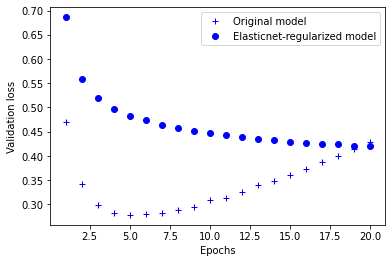

In [18]:
l12_model_val_loss = l12_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l12_model_val_loss, 'bo', label='Elasticnet-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()